# Truck Placements Data Challenge

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the placement data file

In [2]:
placement = pd.read_csv("C:\\Users\\DELL1\\Downloads\\placement_table.csv")

In [3]:
placement.head()

,placement_id,placement_ts,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
0,0,2018-01-01 17:55:15+05:30,TNE3ZJQPRH,10,257,5701819972,27,40411
1,1,2018-01-02 02:48:15+05:30,APBOXM6CYR,21,243,8160025431,20,81731
2,2,2018-01-02 08:07:15+05:30,JHFO87NR8U,21,105,5737886603,17,13562
3,3,2018-01-02 22:33:15+05:30,TN0MUM266Q,25,208,6527430949,18,90496
4,4,2018-01-03 07:51:15+05:30,JH92ZSVZ9I,17,25,5182354054,30,74317


#### Reading the status data file

In [4]:
status = pd.read_csv("C:\\Users\\DELL1\\Downloads\\status_table.csv")

In [5]:
status.head()

,status_ts,placement_id,status,revenue
0,2018-01-01 10:54:15+05:30,1264,in_transit,0
1,2018-01-01 12:57:15+05:30,1428,in_transit,0
2,2018-01-01 13:22:15+05:30,1782,in_transit,0
3,2018-01-01 18:17:15+05:30,2294,in_transit,0
4,2018-01-01 23:51:15+05:30,1482,in_transit,0


#### Converting the timestamp into datetime format

In [6]:
placement['placement_ts']=pd.to_datetime(placement['placement_ts'])
placement.set_index('placement_ts', inplace = True)
placement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000 entries, 2018-01-01 17:55:15+05:30 to 2020-11-16 22:54:15+05:30
Data columns (total 7 columns):
placement_id      3000 non-null int64
truck_plate       3000 non-null object
truck_capacity    3000 non-null int64
driver_id         3000 non-null int64
driver_phone      3000 non-null int64
goods_weight      3000 non-null int64
shipping_fee      3000 non-null int64
dtypes: int64(6), object(1)
memory usage: 187.5+ KB


In [7]:
placement.head()

,placement_id,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
placement_ts,,,,,,,
2018-01-01 17:55:15+05:30,0,TNE3ZJQPRH,10,257,5701819972,27,40411
2018-01-02 02:48:15+05:30,1,APBOXM6CYR,21,243,8160025431,20,81731
2018-01-02 08:07:15+05:30,2,JHFO87NR8U,21,105,5737886603,17,13562
2018-01-02 22:33:15+05:30,3,TN0MUM266Q,25,208,6527430949,18,90496
2018-01-03 07:51:15+05:30,4,JH92ZSVZ9I,17,25,5182354054,30,74317


#### Checking whether there are any duplicates in the placement data

In [8]:
duplicate_placement = placement[placement.duplicated()]
duplicate_placement.shape

(0, 7)

#### Checking whether there are any null values in the placement data

In [9]:
print("Number of NaN values in placement data is "+str(placement.isnull().sum().sum()))

Number of NaN values in placement data is 0


### Q1. How many placements has the company received on a monthly basis, since Jan 2018?

In [10]:
monthly_basis=placement.resample('1M').count()['placement_id']

#### *On average, the company has received 86 placements per month*

In [11]:
print(monthly_basis.mean())

85.71428571428571


### Q2. What is the distribution of the number of placements received per truck in 2020?

#### Filtering the placement data

In [12]:
start_date = '2020-01-01'

mask = (placement.index >= start_date)

k_placement=placement.loc[mask]

k_placement.head()

,placement_id,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
placement_ts,,,,,,,
2020-01-01 06:10:15+05:30,2086,JHACOV8T0K,30,394,7687547708,13,97109
2020-01-01 09:15:15+05:30,2087,TS531CZK0E,30,372,9638746195,16,52456
2020-01-02 00:38:15+05:30,2088,GJW5SDIQ3A,17,150,8154626954,30,94022
2020-01-02 11:07:15+05:30,2089,TNS3V833NJ,10,389,6996252291,20,43982
2020-01-02 17:12:15+05:30,2090,TNS3V833NJ,10,310,5275705583,22,40792


In [13]:
k_placement.shape

(914, 7)

In [14]:
per_truck = k_placement.groupby(['driver_id']).driver_id.count()
print(per_truck)

driver_id
0      1
1      3
2      2
3      1
4      1
      ..
495    1
496    1
497    4
498    2
499    3
Name: driver_id, Length: 429, dtype: int64


#### Plotting the distribution of the number of placements 

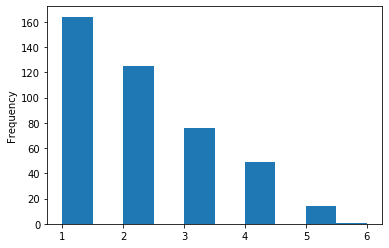

In [15]:
per_truck.plot(kind='hist')

#### The above plot shows that around 160 drivers received only one placement in 2020

#### *On average, each driver received 2 placements approximately in 2020*

In [16]:
avg_per_truck=per_truck.mean()
print(avg_per_truck)

2.1305361305361306


### Q3. How many placements are not fulfilled (never entered “in_transit” or “delivered” status) as of 2020-11-15?

In [17]:
placement.reset_index(level=0, inplace=True)
placement.head()

,placement_ts,placement_id,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
0,2018-01-01 17:55:15+05:30,0,TNE3ZJQPRH,10,257,5701819972,27,40411
1,2018-01-02 02:48:15+05:30,1,APBOXM6CYR,21,243,8160025431,20,81731
2,2018-01-02 08:07:15+05:30,2,JHFO87NR8U,21,105,5737886603,17,13562
3,2018-01-02 22:33:15+05:30,3,TN0MUM266Q,25,208,6527430949,18,90496
4,2018-01-03 07:51:15+05:30,4,JH92ZSVZ9I,17,25,5182354054,30,74317


In [18]:
not_fulfilled = placement[placement.placement_id.isin(status.placement_id) == False]
not_fulfilled.head()

,placement_ts,placement_id,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
755,2018-09-30 04:48:15+05:30,755,JHRWVSH0G4,25,320,9902415009,14,33151
997,2018-12-21 13:10:15+05:30,997,WBOII03XRG,25,5,6095853178,28,54075
1020,2018-12-30 07:40:15+05:30,1020,TSIGCYVQ0G,21,354,8845219157,28,35979
1401,2019-05-14 13:50:15+05:30,1401,JH4K5GRWAG,17,246,7548817375,33,98836
1437,2019-05-26 08:36:15+05:30,1437,TSHHIAKVHS,21,24,6614186672,26,52906


#### *There are 10 placements which are not fullfilled*

In [19]:
not_fulfilled.shape

(10, 8)

### Q4. What’s the company’s monthly profit margin since 2018-01-01?

In [20]:
status.tail()

,status_ts,placement_id,status,revenue
5975,2021-06-06 23:09:15+05:30,2354,delivered,76838
5976,2021-06-07 02:40:15+05:30,2997,delivered,100792
5977,2021-06-07 06:26:15+05:30,1653,delivered,109800
5978,2021-06-07 08:59:15+05:30,897,delivered,121074
5979,2021-06-07 10:18:15+05:30,2776,delivered,53802


#### Filtering the status data

In [21]:
filter = status['status']=="delivered"
  
# filtering status 
status.where(filter, inplace = True)

status.dropna(inplace = True)

status.head()

,status_ts,placement_id,status,revenue
71,2018-01-15 17:43:15+05:30,1858.0,delivered,139313.0
81,2018-01-17 10:54:15+05:30,961.0,delivered,127853.0
120,2018-01-26 18:56:15+05:30,1961.0,delivered,71620.0
138,2018-01-29 21:22:15+05:30,157.0,delivered,64193.0
145,2018-02-01 04:46:15+05:30,1160.0,delivered,127907.0


In [22]:
status.shape

(2990, 4)

In [23]:
pl_status = pd.merge(placement,status,on="placement_id")

pl_status.shape

(2990, 11)

In [24]:
pl_status['profit']=pl_status['revenue']-pl_status['shipping_fee']
pl_status['margin']=pl_status['profit']/pl_status['revenue']

In [25]:
pl_status.head()

,placement_ts,placement_id,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee,status_ts,status,revenue,profit,margin
0,2018-01-01 17:55:15+05:30,0,TNE3ZJQPRH,10,257,5701819972,27,40411,2020-02-04 14:40:15+05:30,delivered,67281.0,26870.0,0.399370
1,2018-01-02 02:48:15+05:30,1,APBOXM6CYR,21,243,8160025431,20,81731,2020-08-29 17:56:15+05:30,delivered,126349.0,44618.0,0.353133
2,2018-01-02 08:07:15+05:30,2,JHFO87NR8U,21,105,5737886603,17,13562,2021-04-18 08:22:15+05:30,delivered,69805.0,56243.0,0.805716
3,2018-01-02 22:33:15+05:30,3,TN0MUM266Q,25,208,6527430949,18,90496,2021-02-12 20:04:15+05:30,delivered,145395.0,54899.0,0.377585
4,2018-01-03 07:51:15+05:30,4,JH92ZSVZ9I,17,25,5182354054,30,74317,2021-04-14 23:25:15+05:30,delivered,110139.0,35822.0,0.325244


In [26]:
pl_status.set_index('placement_ts', inplace = True)

monthly_margin=pl_status.margin.resample('1M').mean()

#### Plotting the monthly margins

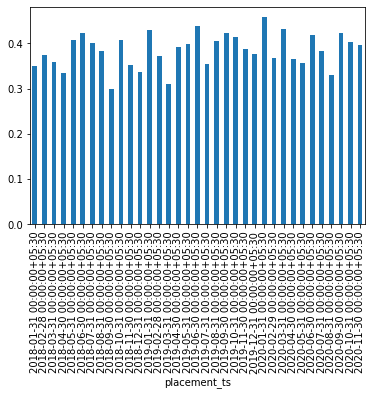

In [27]:
monthly_margin.plot(kind='bar')

In [28]:
print(str(monthly_margin.mean()*100)+("%"))

38.43035757236925%


#### *On average, the monthly profit margin of the company is 38.43%* 

### Q5. The dataset is randomly generated. Do you see any data hygiene problems with it?

In [29]:
placement.corr()

,placement_id,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
placement_id,1.000000,0.035630,0.024868,0.050383,-0.015232,-0.026276
truck_capacity,0.035630,1.000000,-0.001574,-0.008766,-0.004209,-0.000005
driver_id,0.024868,-0.001574,1.000000,0.054953,0.015543,0.028155
driver_phone,0.050383,-0.008766,0.054953,1.000000,-0.002645,0.016731
goods_weight,-0.015232,-0.004209,0.015543,-0.002645,1.000000,-0.013713
shipping_fee,-0.026276,-0.000005,0.028155,0.016731,-0.013713,1.000000


#### *From the above correlation table, it is clearly understood that no feature has any positive or negative correlation with the other.
#### Also, there are no any other hygiene problems with the data such as duplicates, null values, outliers, etc.,*

### Q6. What other insights can you get out of these two tables? Propose the analysis and run one of them that you find most interesting.

In [30]:
pl_status.head()

,placement_id,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee,status_ts,status,revenue,profit,margin
placement_ts,,,,,,,,,,,,
2018-01-01 17:55:15+05:30,0,TNE3ZJQPRH,10,257,5701819972,27,40411,2020-02-04 14:40:15+05:30,delivered,67281.0,26870.0,0.399370
2018-01-02 02:48:15+05:30,1,APBOXM6CYR,21,243,8160025431,20,81731,2020-08-29 17:56:15+05:30,delivered,126349.0,44618.0,0.353133
2018-01-02 08:07:15+05:30,2,JHFO87NR8U,21,105,5737886603,17,13562,2021-04-18 08:22:15+05:30,delivered,69805.0,56243.0,0.805716
2018-01-02 22:33:15+05:30,3,TN0MUM266Q,25,208,6527430949,18,90496,2021-02-12 20:04:15+05:30,delivered,145395.0,54899.0,0.377585
2018-01-03 07:51:15+05:30,4,JH92ZSVZ9I,17,25,5182354054,30,74317,2021-04-14 23:25:15+05:30,delivered,110139.0,35822.0,0.325244


In [31]:
pl_status.describe()

,placement_id,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee,revenue,profit,margin
count,2990.000000,2990.000000,2990.000000,2.990000e+03,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000
mean,1498.978261,21.145819,249.985953,7.465531e+09,21.298328,56063.689298,99845.244147,43781.554849,0.384375
std,866.759208,6.952028,146.701767,1.512125e+09,8.026176,25767.936234,28965.041459,38566.484013,0.356150
min,0.000000,10.000000,0.000000,5.012924e+09,8.000000,10059.000000,50014.000000,-47621.000000,-0.928836
25%,747.250000,17.000000,122.000000,6.158574e+09,14.000000,34035.250000,74691.000000,16072.750000,0.188409
50%,1499.500000,21.000000,254.000000,7.402781e+09,21.000000,56506.000000,99000.000000,43354.500000,0.436358
75%,2248.750000,25.000000,377.000000,8.864159e+09,28.000000,78119.750000,125629.500000,71554.250000,0.657426
max,2999.000000,30.000000,499.000000,9.995613e+09,35.000000,99979.000000,149992.000000,138697.000000,0.932379


#### *From the pl_status data, it is visible that at some placements, the goods weight was higher than the truck capacity and it simply means that the truck makes more than one trip to complete a placement if necessary.
#### From the above table, it is understood that there have been losses due to some placements as the minimum profit is negative.*